## Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [2]:
#Cell 2: Load and Explore the Glass Dataset
# Import necessary libraries for data manipulation, visualization, and KNN model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
#Cell 3: Dataset Information and Summary
# Load the Glass dataset from a CSV file
glass_data = pd.read_csv("glass.csv")

# Display the first few rows of the dataset to understand its structure
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Cell 4: Check for Missing Values
# Get the shape of the dataset
print("Shape of the dataset:", glass_data.shape)

# Display information about the dataset including data types and non-null counts
glass_data.info()

# Show descriptive statistics for numerical features
glass_data.describe()

Shape of the dataset: (214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
#Cell 5: Data Visualization
# Check for any missing values in the dataset
missing_values = glass_data.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


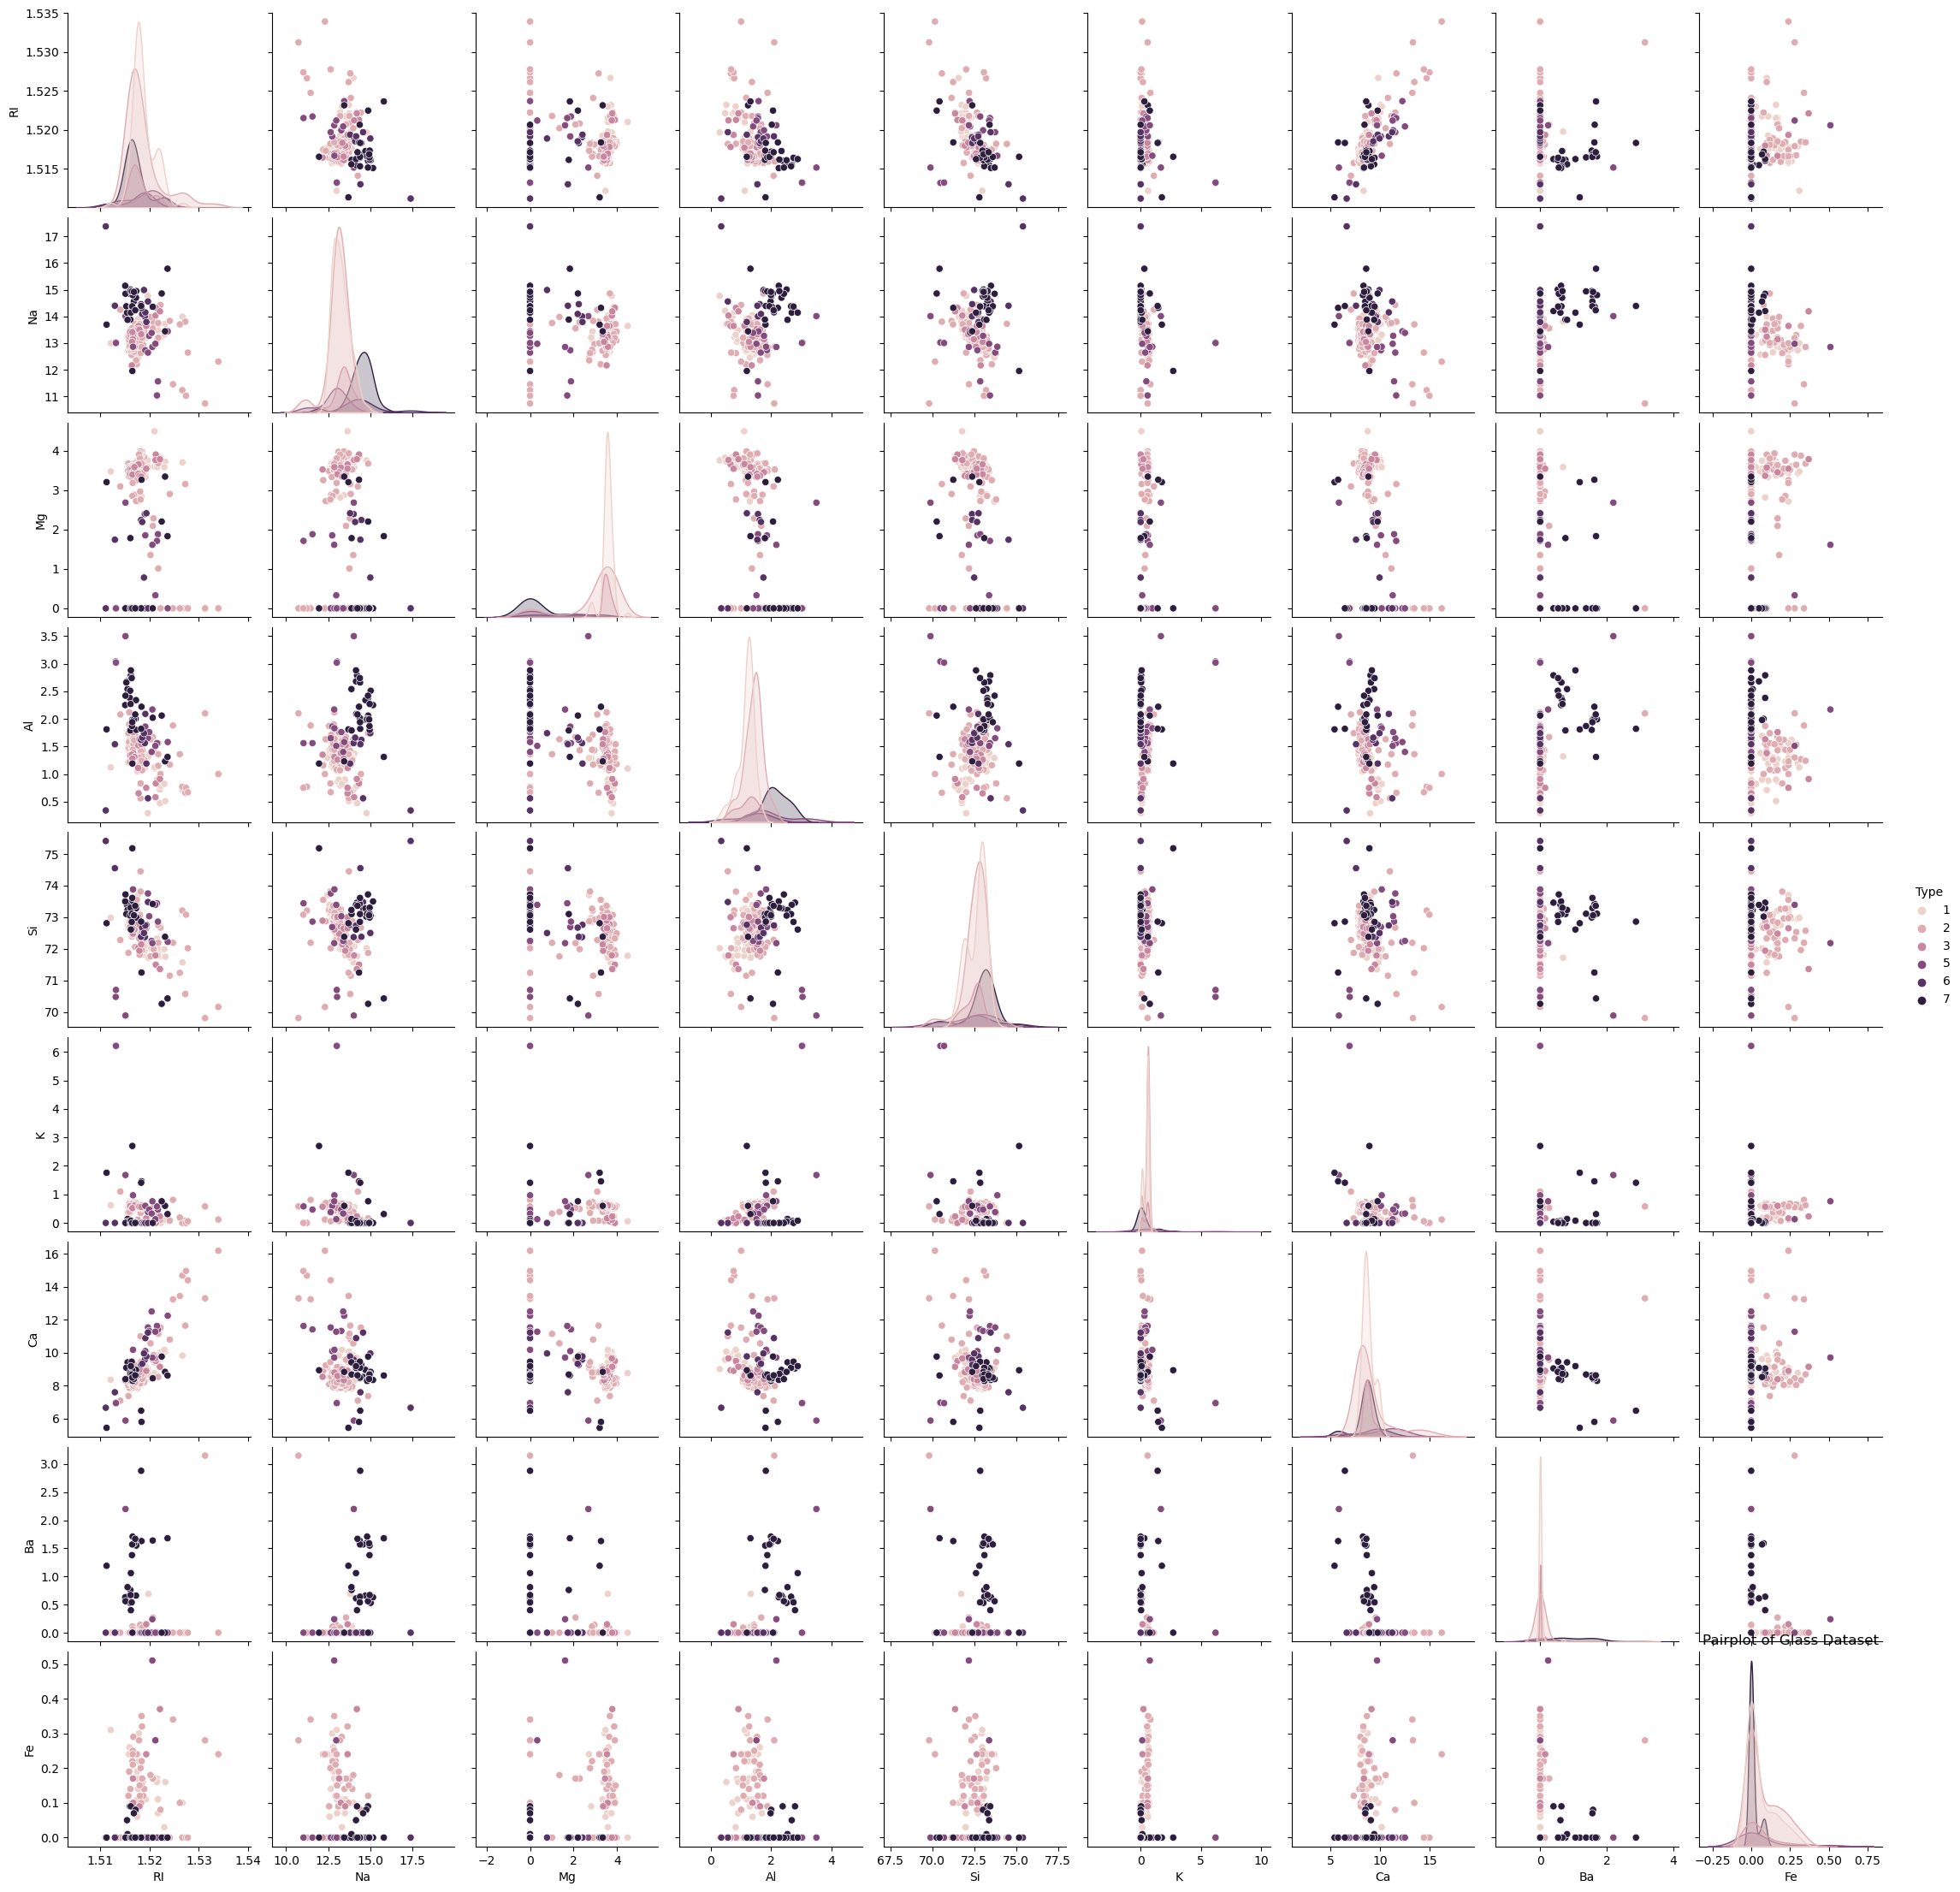

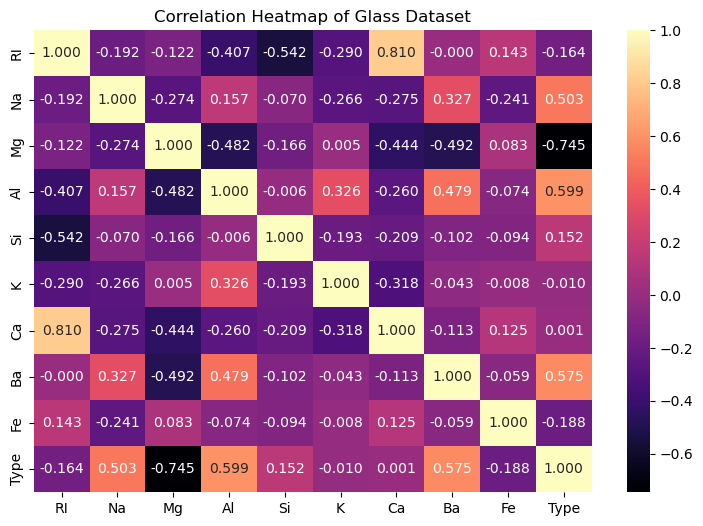

In [6]:
#Cell 6: Prepare Data for KNN Model
# Visualize relationships between features using pairplot
sns.pairplot(glass_data, hue='Type')
plt.title("Pairplot of Glass Dataset")
plt.show()

# Create a heatmap to visualize correlations between features
plt.figure(figsize=(9, 6))
sns.heatmap(glass_data.corr(), cmap='magma', annot=True, fmt='.3f')
plt.title("Correlation Heatmap of Glass Dataset")
plt.show()

In [7]:
#Cell 7: Build and Train KNN Model
# Define features (X) and target variable (Y)
features = glass_data.iloc[:, 0:9]  # All columns except the last one
target = glass_data.iloc[:, -1]      # Last column as target

# Display the features and target
print("Features:\n", features.head())
print("Target:\n", target.head())

Features:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
Target:
 0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [8]:
#Cell 8: Cross-Validation
# Initialize the KNN classifier with a specified number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=12)

# Fit the model to the data
knn_model.fit(features, target)

KNeighborsClassifier(n_neighbors=12)

In [30]:
#Cell 9: Make Predictions
# Set up K-Fold cross-validation with 8 splits
kf = KFold(n_splits=8)

# Evaluate the model using cross-validation
cv_results = cross_val_score(knn_model, features, target, cv=kf)

# Display the cross-validation results
print("Cross-validation results:", cv_results)
print("Mean accuracy from cross-validation:", cv_results.mean())

Cross-validation results: [0.51851852 0.81481481 0.88888889 0.37037037 0.44444444 0.22222222
 0.         0.        ]
Mean accuracy from cross-validation: 0.4074074074074074


In [29]:
#Cell 10: Hyperparameter Tuning with Grid Search
# Make a prediction for a new sample
sample_prediction = knn_model.predict([[1.51651, 14.38, 0.00, 1.94, 73.61, 0.00, 8.48, 1.57, 0.0]])
print("Predicted class for the sample:", sample_prediction)

Predicted class for the sample: [7]


In [28]:
#Cell 11: Visualize Grid Search Results
# Define a range of neighbors to test
neighbors_range = list(range(1, 33))
param_grid = {'n_neighbors': neighbors_range}

# Set up Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid)
grid_search.fit(features, target)

# Display the best score and parameters from the grid search
print("Best cross-validation score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best cross-validation score: 0.640531561461794
Best parameters: {'n_neighbors': 1}


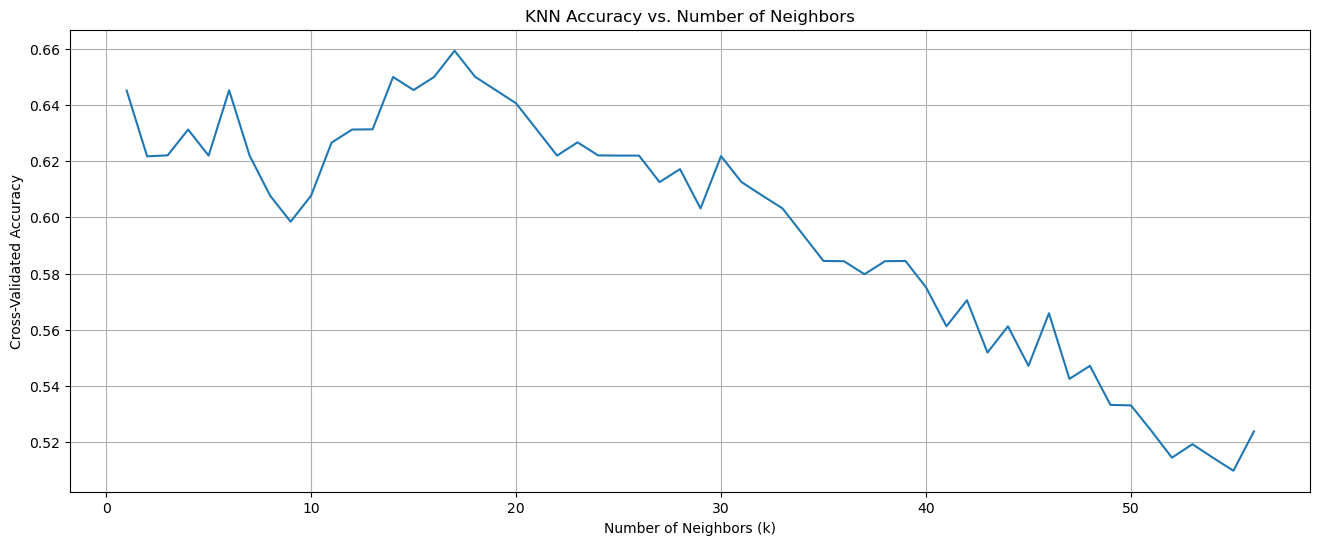

In [27]:
#Cell 12: Load and Explore the Zoo Dataset
# Prepare to visualize the accuracy for different values of k
k_values = range(1, 57)
accuracy_scores = []

# Calculate the mean accuracy for each k value
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, features, target, cv=4)
  accuracy_scores.append(scores.mean())

# Plot the accuracy against the number of neighbors
plt.figure(figsize=(16, 6))
plt.plot(k_values, accuracy_scores)
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

## Implement a KNN model to classify the animals in to categories

In [26]:
#Cell 13: Zoo Dataset Information and Summary
# Load the Zoo dataset from a CSV file
zoo_data = pd.read_csv("Zoo.csv")

# Display the first few rows of the dataset to understand its structure
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
#Cell 14: Check for Missing Values in Zoo Dataset
# Check for any missing values in the Zoo dataset
missing_values_zoo = zoo_data.isna().sum()
print("Missing values in each column of Zoo dataset:\n", missing_values_zoo)

Missing values in each column of Zoo dataset:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


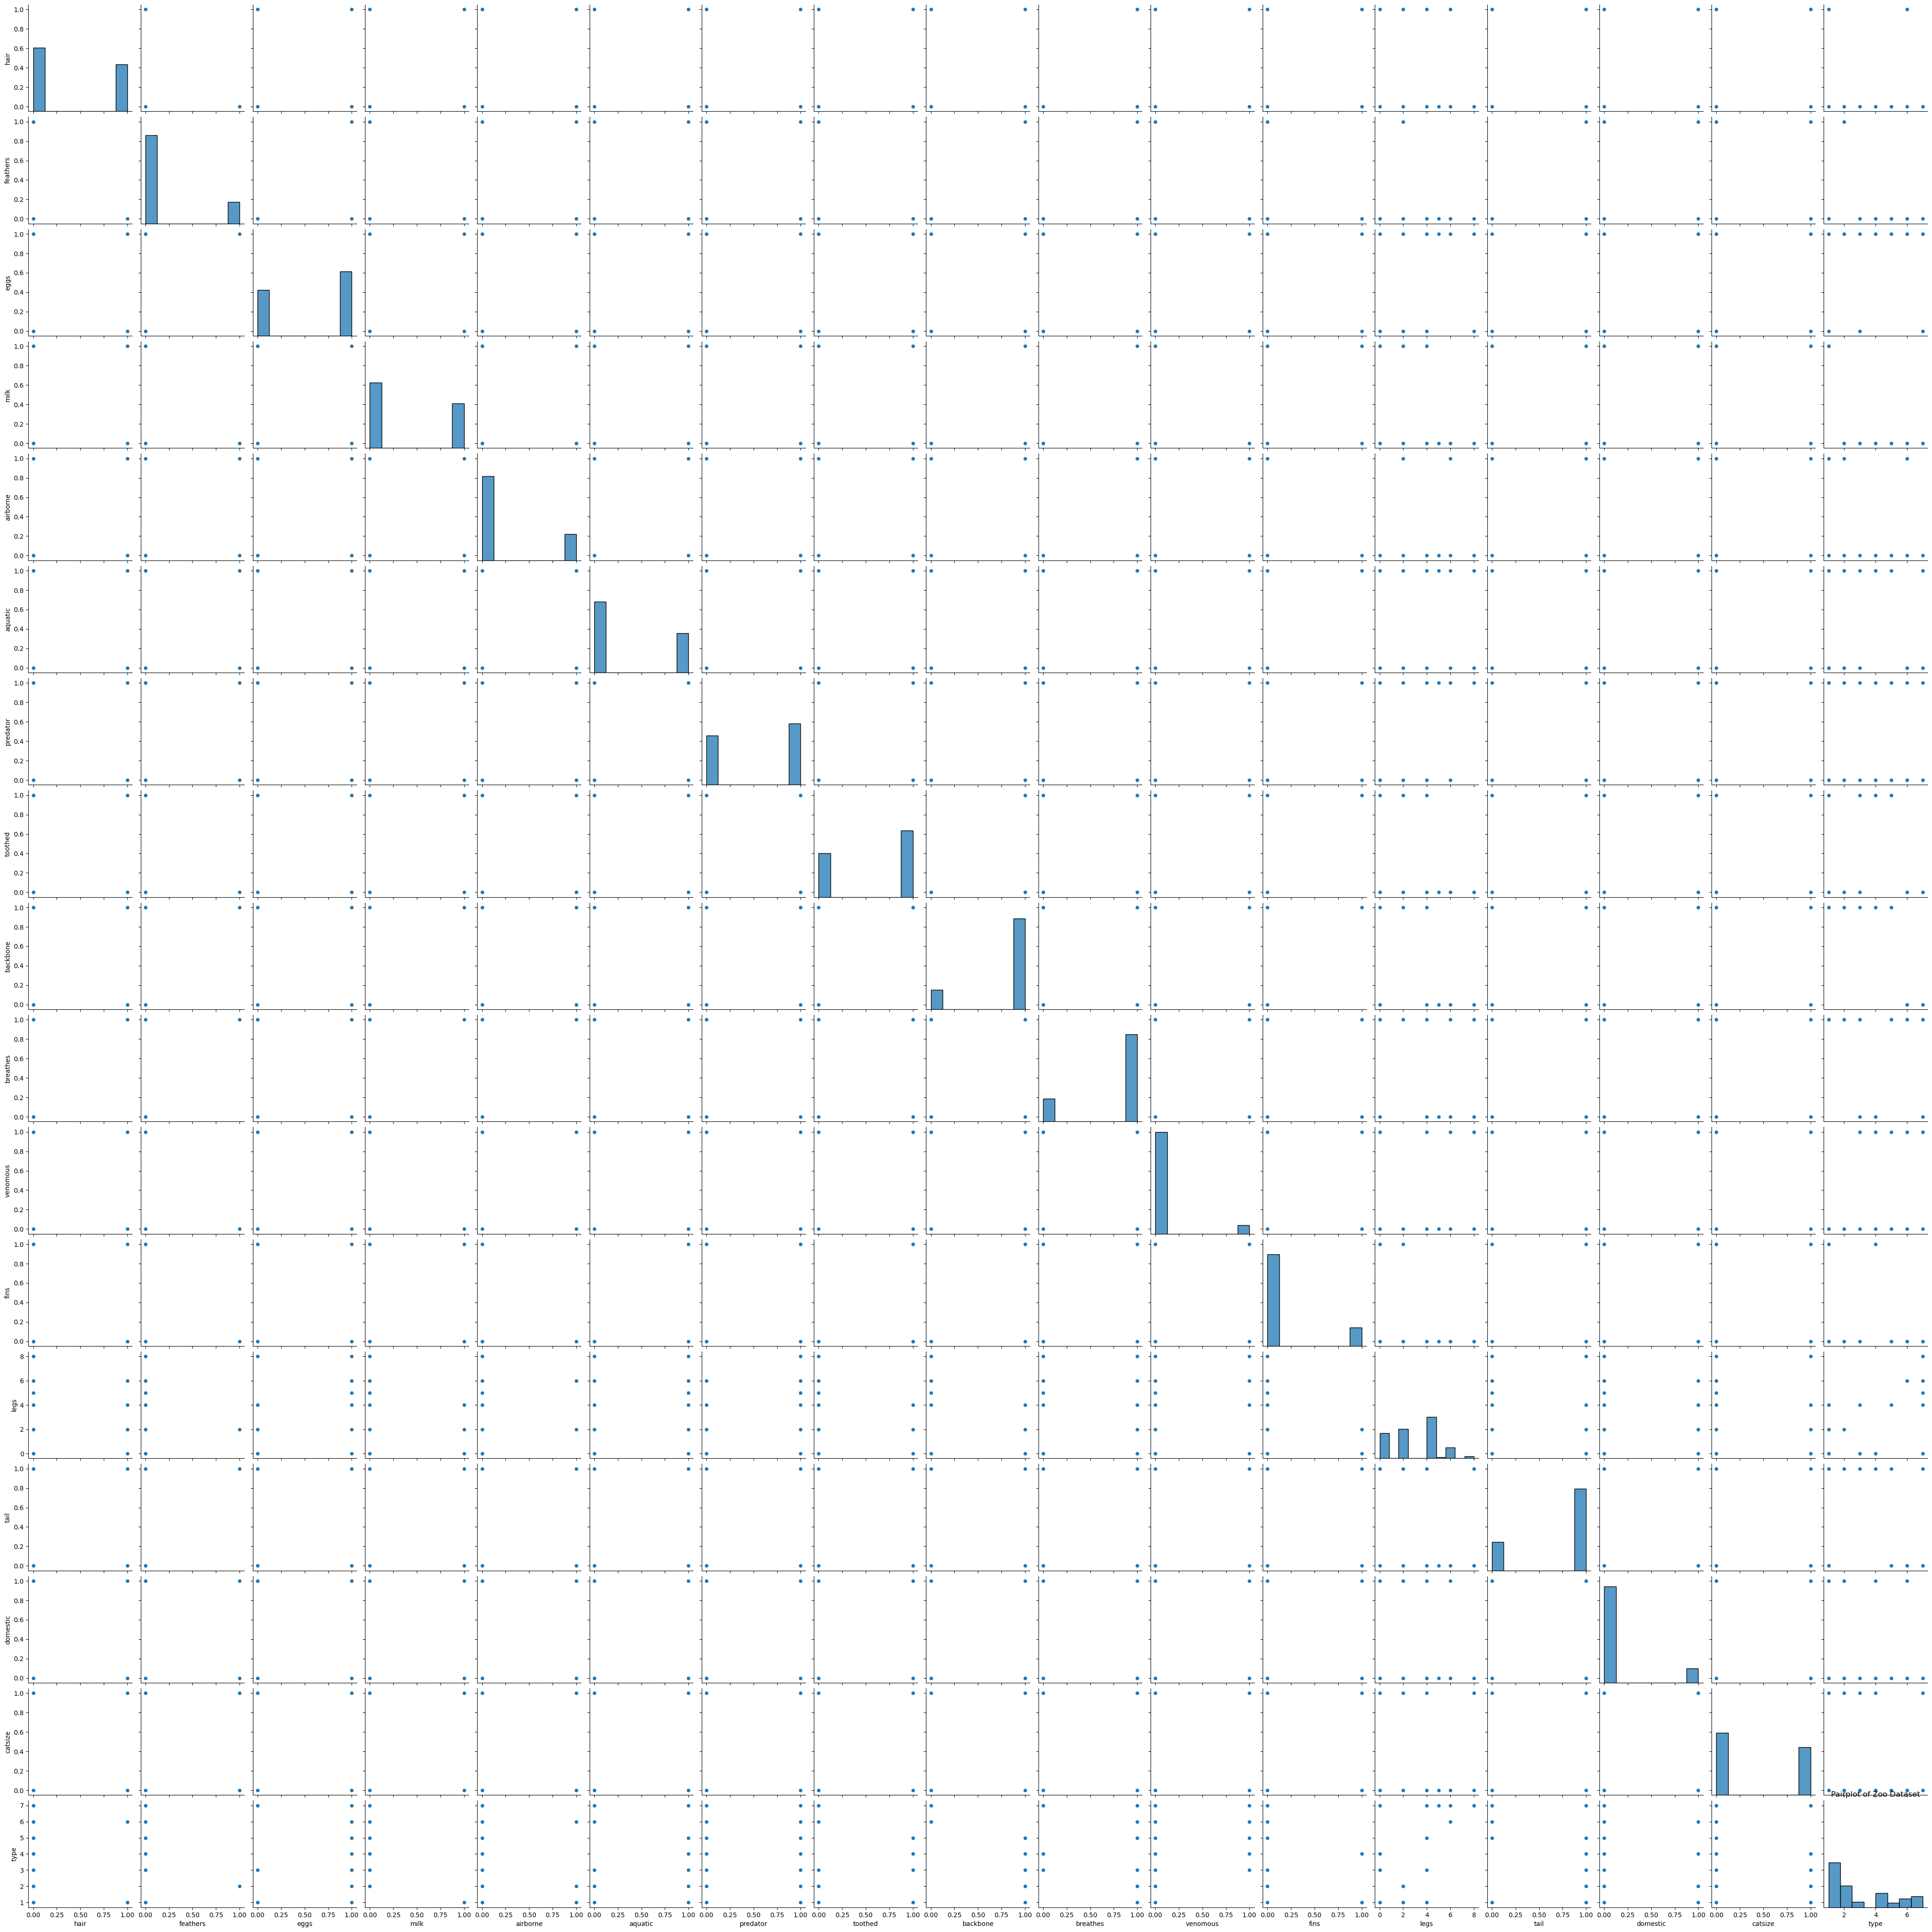

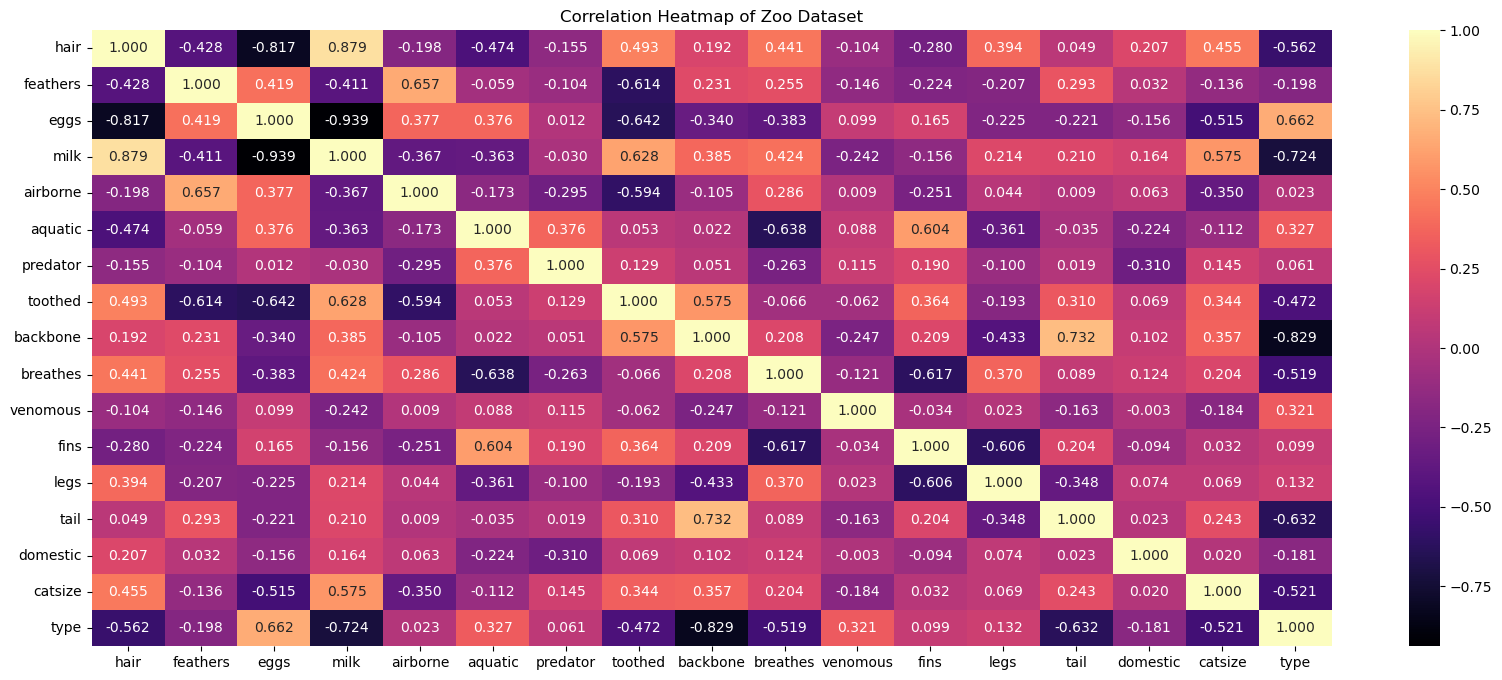

In [24]:
#Cell 15: Data Visualization for Zoo Dataset
# Visualize relationships between features using pairplot
sns.pairplot(zoo_data)
plt.title("Pairplot of Zoo Dataset")
plt.show()

# Create a heatmap to visualize correlations between features
plt.figure(figsize=(20, 8))
sns.heatmap(zoo_data.corr(), cmap='magma', annot=True, fmt='.3f')
plt.title("Correlation Heatmap of Zoo Dataset")
plt.show()

In [23]:
#Cell 16: Prepare Data for KNN Model on Zoo Dataset
# Define features (X) and target variable (Y) for the Zoo dataset
features_zoo = zoo_data.iloc[:, 1:17]  # All columns except the first one
target_zoo = zoo_data.iloc[:, -1]       # Last column as target

# Display the features and target
print("Zoo Features:\n", features_zoo.head())
print("Zoo Target:\n", target_zoo.head())

Zoo Features:
    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1  
Zoo Target:
 0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64


In [22]:
#Cell 17: Build and Train KNN Model for Zoo Dataset
# Initialize the KNN classifier with a specified number of neighbors
knn_model_zoo = KNeighborsClassifier(n_neighbors=17)

# Fit the model to the Zoo data
knn_model_zoo.fit(features_zoo, target_zoo)

KNeighborsClassifier(n_neighbors=17)

In [19]:
#Cell 18: Cross-Validation for Zoo Dataset
# Set up K-Fold cross-validation with 12 splits for the Zoo dataset
kf_zoo = KFold(n_splits=12)

# Evaluate the model using cross-validation
cv_results_zoo = cross_val_score(knn_model_zoo, features_zoo, target_zoo, cv=kf_zoo)

# Display the cross-validation results
print("Zoo Cross-validation results:", cv_results_zoo)
print("Mean accuracy from Zoo cross-validation:", cv_results_zoo.mean())

Zoo Cross-validation results: [1.         0.66666667 0.66666667 1.         0.66666667 0.75
 0.875      0.75       0.625      0.625      0.5        0.875     ]
Mean accuracy from Zoo cross-validation: 0.75


In [20]:
#Cell 19: Hyperparameter Tuning for Zoo Dataset
# Define a range of neighbors to test for the Zoo dataset
neighbors_range_zoo = list(range(1, 40))
param_grid_zoo = {'n_neighbors': neighbors_range_zoo}

# Set up Grid Search for hyperparameter tuning for the Zoo dataset
grid_search_zoo = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_zoo)
grid_search_zoo.fit(features_zoo, target_zoo)

# Display the best score and parameters from the grid search
print("Best cross-validation score for Zoo dataset:", grid_search_zoo.best_score_)
print("Best parameters for Zoo dataset:", grid_search_zoo.best_params_)

Best cross-validation score for Zoo dataset: 0.97
Best parameters for Zoo dataset: {'n_neighbors': 1}


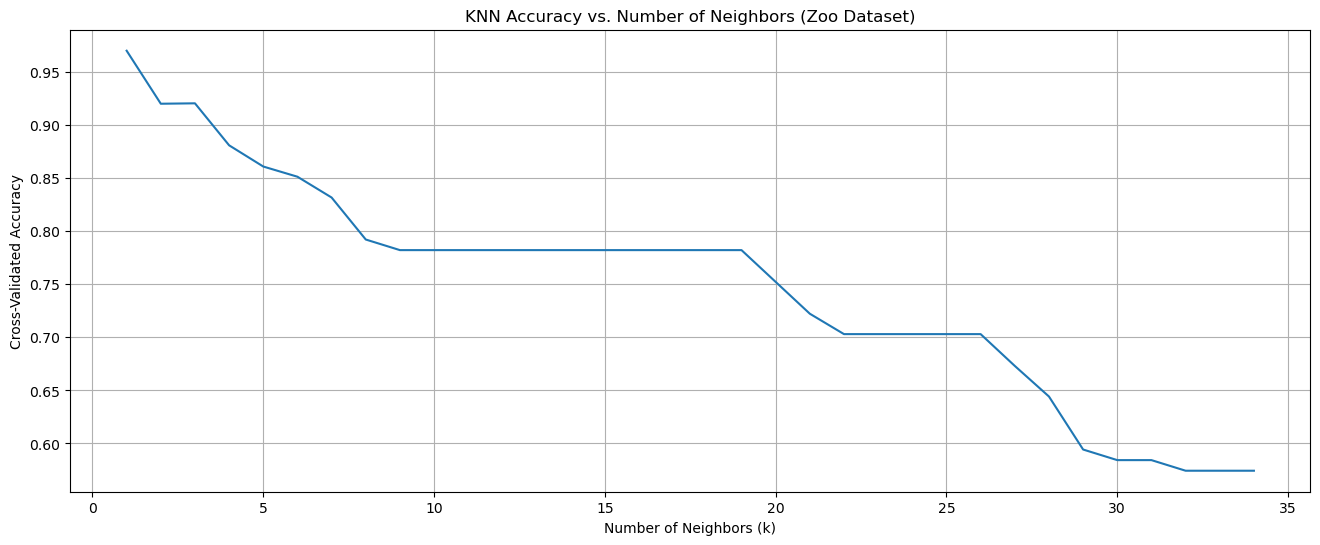

In [21]:
#Cell 20: Visualize Grid Search Results for Zoo Dataset
# Prepare to visualize the accuracy for different values of k for the Zoo dataset
k_values_zoo = range(1, 35)
accuracy_scores_zoo = []

# Calculate the mean accuracy for each k value for the Zoo dataset
for k in k_values_zoo:
  knn_zoo = KNeighborsClassifier(n_neighbors=k)
  scores_zoo = cross_val_score(knn_zoo, features_zoo, target_zoo, cv=4)
  accuracy_scores_zoo.append(scores_zoo.mean())

# Plot the accuracy against the number of neighbors for the Zoo dataset
plt.figure(figsize=(16, 6))
plt.plot(k_values_zoo, accuracy_scores_zoo)
plt.title("KNN Accuracy vs. Number of Neighbors (Zoo Dataset)")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()